# Multivariate Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



warnings.filterwarnings('ignore')


In [6]:
tips=sns.load_dataset('tips')
titanic=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\train.csv")
flights=sns.load_dataset('flights')
iris=sns.load_dataset('iris')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips.shape

(244, 7)

In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# 1.Scatterplot(Numerical-Numerical)

In [6]:
'''this will help to find the relationship between 2 columns'''

'this will help to find the relationship between 2 columns'

<Axes: xlabel='total_bill', ylabel='tip'>

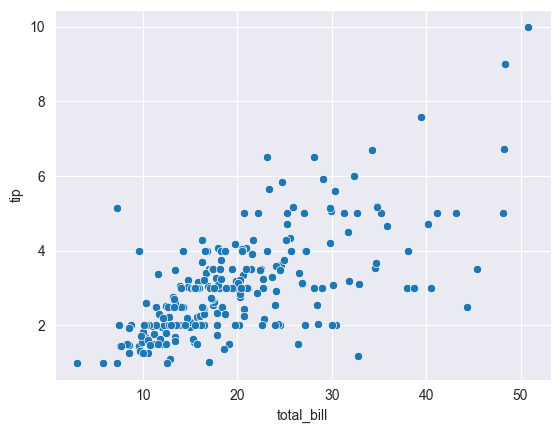

In [10]:
sns.scatterplot(x=tips['total_bill'],y= tips['tip'])

In [11]:
''' a linear growth grater the bill greater the tips'''
'''now i want to see the gender also for that we will use multivariate in scatterplot instead of following bivariate '''

'now i want to see the gender also for that we will use multivariate in scatterplot instead of following bivariate '

<Axes: xlabel='total_bill', ylabel='tip'>

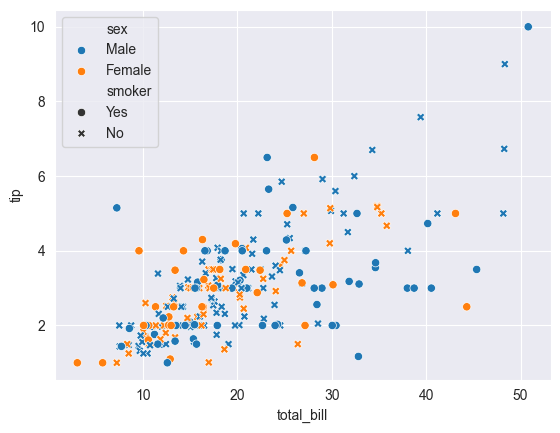

In [13]:
sns.scatterplot(x=tips['total_bill'],y= tips['tip'],hue=tips['sex'],style=tips['smoker'])

# 2.Bar plot (Numerical - Categorical)


In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
'''find pclass avg for every age
'''

'find pclass avg for every age\n'

<Axes: xlabel='Pclass', ylabel='Age'>

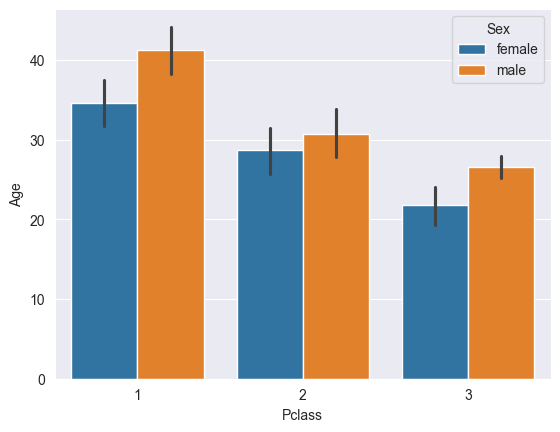

In [20]:
sns.barplot(x=titanic['Pclass'],y= titanic['Age'],hue=titanic['Sex'])


In [ ]:
''' black rod tells about confidence interval'''

# 3.Boxplot(numerical-categprical)

<Axes: xlabel='Sex', ylabel='Age'>

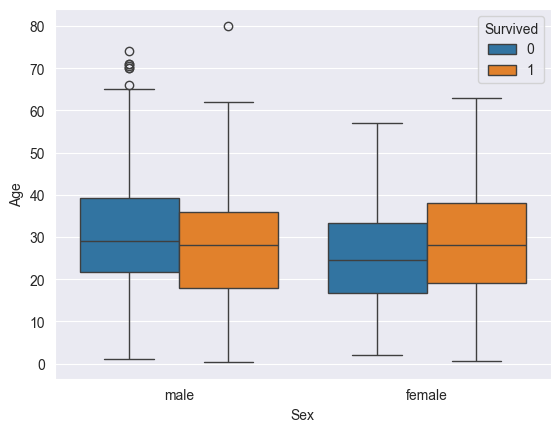

In [13]:
sns.boxplot(x=titanic["Sex"],y= titanic["Age"],hue=titanic['Survived'])

<Axes: xlabel='Survived', ylabel='Age'>

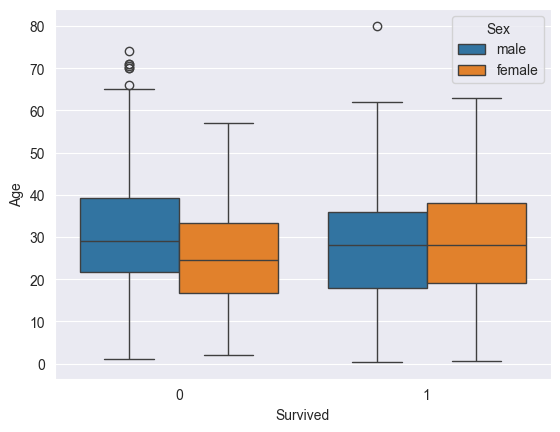

In [14]:
sns.boxplot(x=titanic["Survived"],y= titanic["Age"],hue=titanic['Sex'])

# 4.Displot(numerical-categorical)


ValueError: `bins` must increase monotonically, when an array

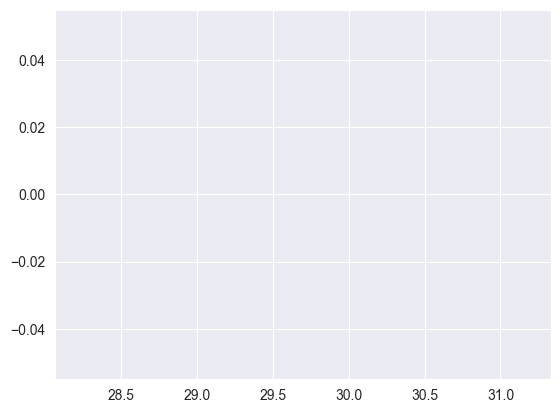

In [43]:
sns.distplot(titanic['Age'],titanic['Survived']==0)
'''distplot is not supported for newer version and replaced by displot'''

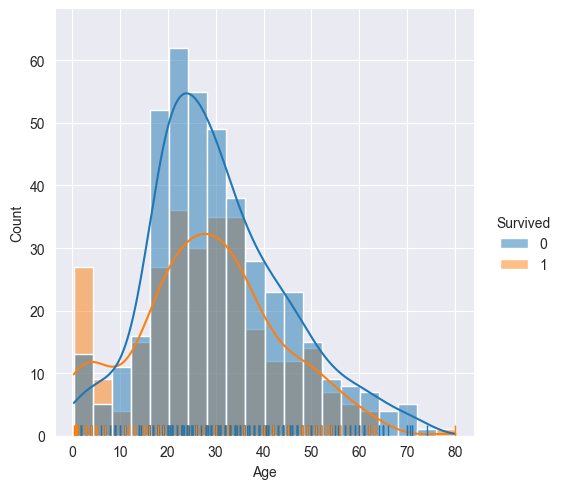

In [44]:
sns.displot(data=titanic, x='Age', hue='Survived', kde=True, rug=True)

# 5.Heatmap(Categorical categorical)

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

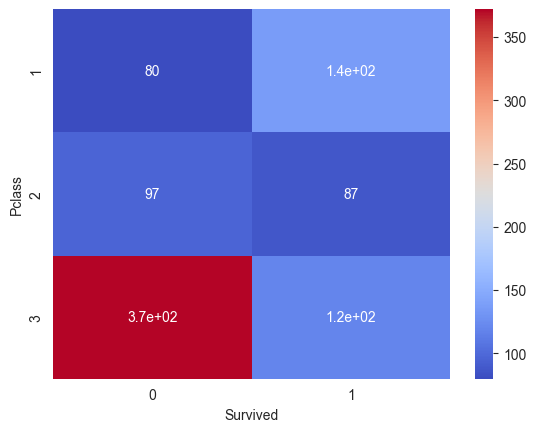

In [63]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']),annot=True,cmap='coolwarm')

In [51]:
titanic.groupby('Pclass').mean()['Survived']

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='Sex'>

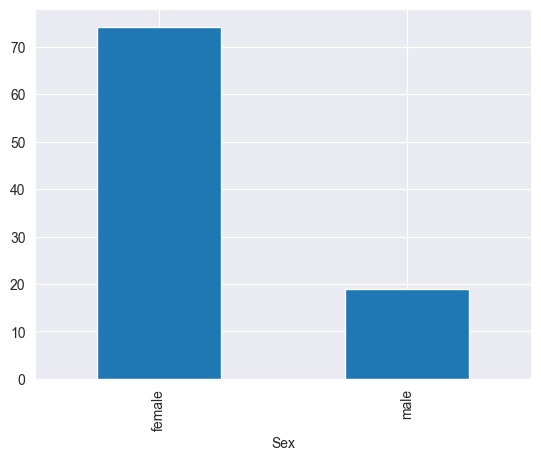

In [57]:
(titanic.groupby('Sex')['Survived'].mean()*100).plot(kind='bar')

<Axes: xlabel='Embarked'>

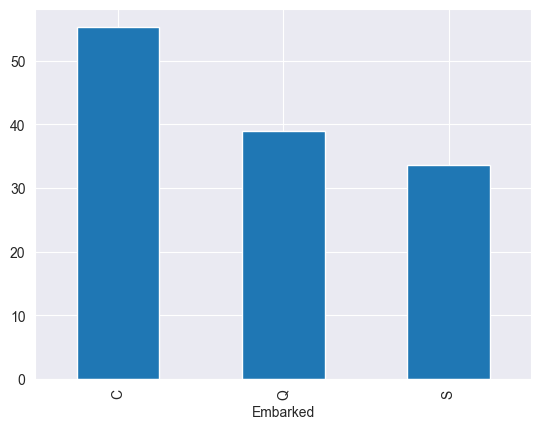

In [64]:
(titanic.groupby('Embarked')['Survived'].mean()*100).plot(kind='bar')

In [81]:
pd.crosstab(
    index=titanic['Pclass'],
    columns=titanic['Embarked'],
    values=titanic['Survived'],
    aggfunc='mean'
)*100


Embarked,C,Q,S
Pclass,,,
1,69.411765,50.000000,58.267717
2,52.941176,66.666667,46.341463
3,37.878788,37.500000,18.980170


# Clustermap(Categorical categorical)

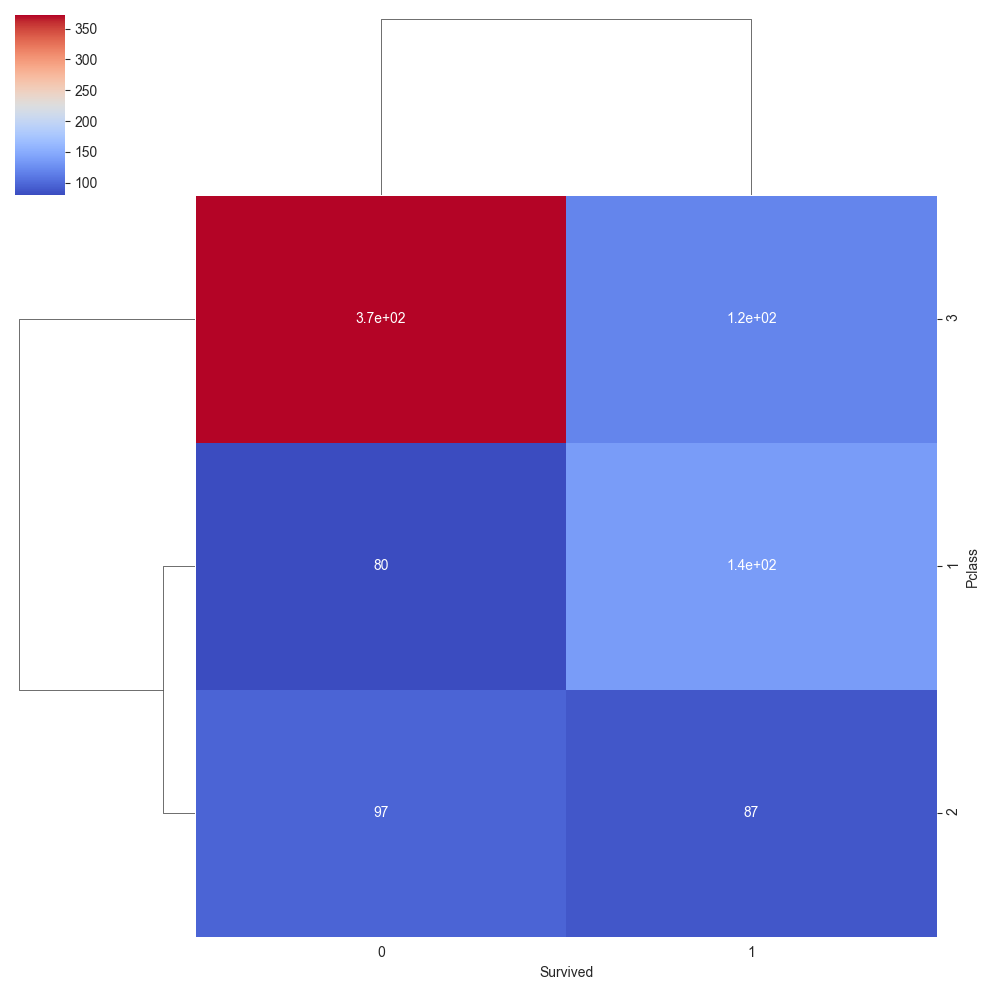

In [82]:
sns.clustermap(pd.crosstab(titanic['Pclass'],titanic['Survived']),annot=True,cmap='coolwarm')

# 7.Pairplot(numerical-numerical)

In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


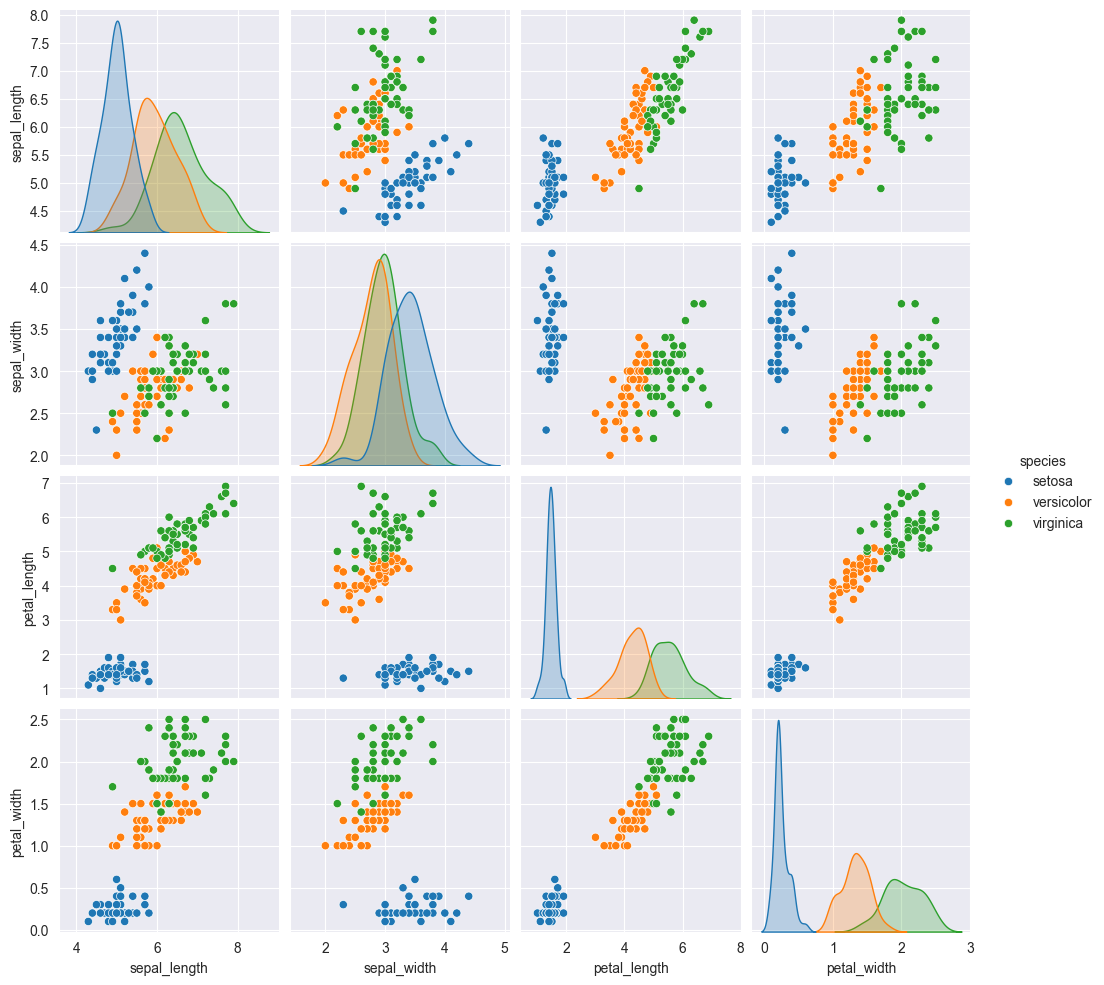

In [85]:
sns.pairplot(iris,hue='species')

# 8. lineplot(Numerical-Numerical)

In [86]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [90]:
new=flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

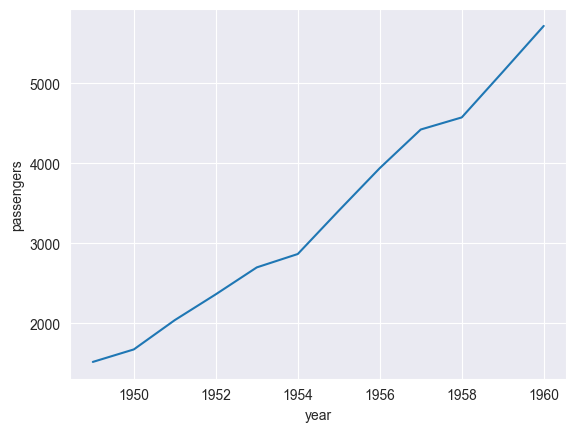

In [91]:
sns.lineplot(x='year',y='passengers',data=new)

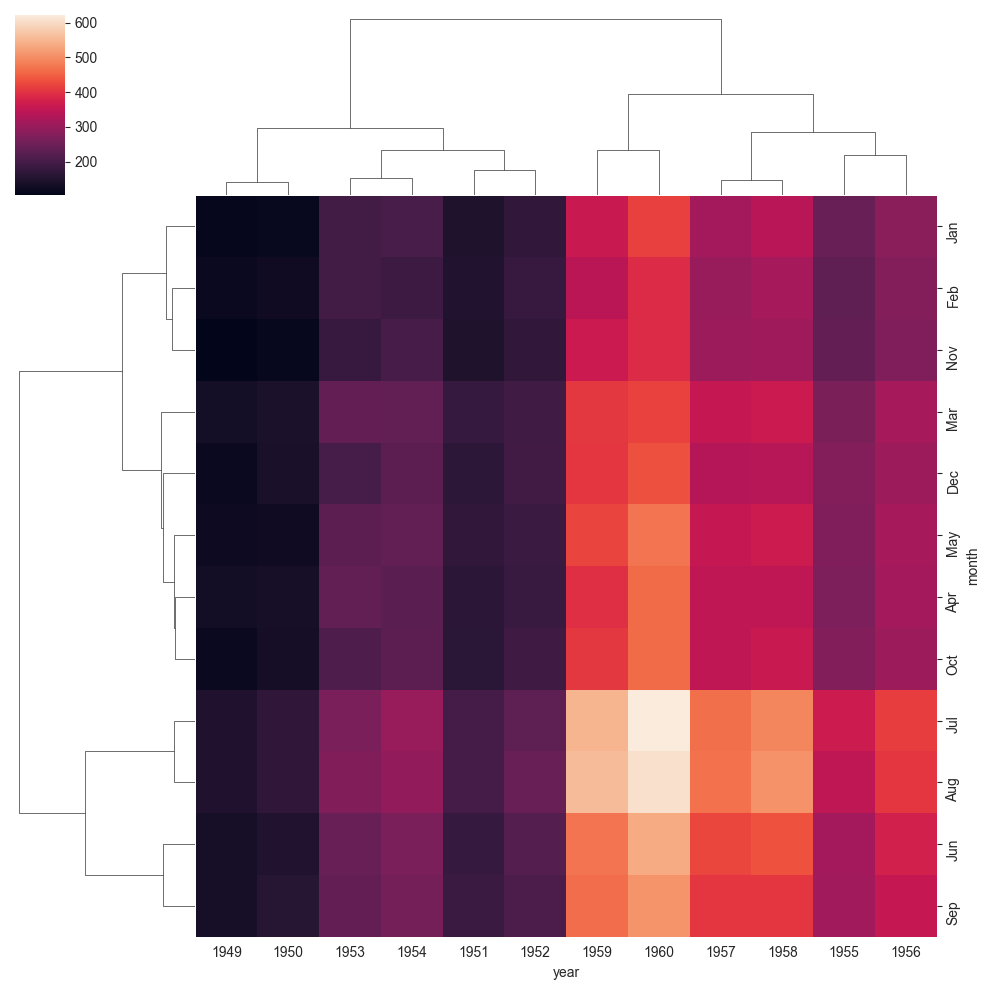

In [92]:
sns.clustermap(flights.pivot_table(index='month',columns='year',values='passengers'))

<Axes: xlabel='year', ylabel='month'>

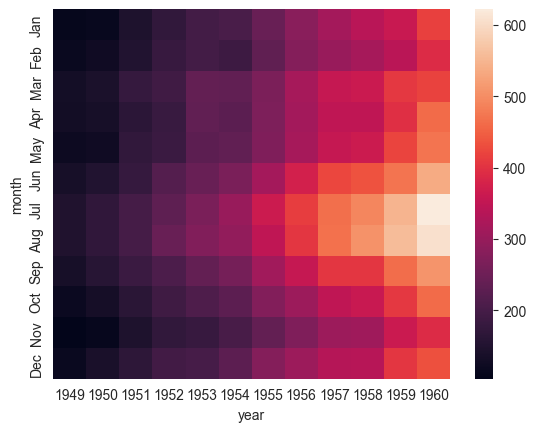

In [93]:
sns.heatmap(flights.pivot_table(index='month',columns='year',values='passengers'))

In [94]:
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0
